Классификация: (1) загрузите данные из прилагаемого файла (это двумерная выборка, целевая переменная на которой принимает значения 1 или -1). Можете самостоятельно подготовить датасет, задав случайным образом точки на плоскости и поделив их примерно поровну относительно какой-нибудь прямой. Каждой точке сопоставьте целевое значение (-1 или 1). При этом обязательно часть точек классифицируйте ошибочно для выполнения задания. (2) Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts(). (3) Отобразите точками на плоскости признаки, различая классы цветом. Уберите данные, которые не попали в диапазон значений от -5 до 5 (будем считать их выбросами). (4) Разделите данные на признаки и ответы. (5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели). Для обучения используйте всю выборку. (6) Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели. (7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения. (8) Получите оценки качества классификации (на обучающей выборке): доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения. (9) В окрестности гиперплоскости задайте некоторое количество случайных точек (отобразите их на рисунке новым цветом). Определите при помощи построенной модели принадлежность классу. Ошибается ли Ваша модель (оцените визуально)? В каком случае?

## Классификация

In [2]:
import pandas as pd
import sklearn

**(1) загрузите данные из прилагаемого файла (это двумерная выборка, целевая переменная на которой принимает значения 1 или -1). Можете самостоятельно подготовить датасет, задав случайным образом точки на плоскости и поделив их примерно поровну относительно какой-нибудь прямой. Каждой точке сопоставьте целевое значение (-1 или 1). При этом обязательно часть точек классифицируйте ошибочно для выполнения задания.**

In [3]:
data = pd.read_csv('./data/logistic.csv', names=['y', 'x1', 'x2'])
data.head()

,y,x1,x2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


**(2) Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().**

In [4]:
data['y'].value_counts()

 1    105
-1    100
Name: y, dtype: int64

Наблюдения распределились примерно поровну.

**(3) Отобразите точками на плоскости признаки, различая классы цветом. Уберите данные, которые не попали в диапазон значений от -5 до 5 (будем считать их выбросами).**

In [5]:
data = data[data['x1'] >= -5]
data = data[data['x1'] <= 5]
data = data[data['x2'] >= -5]
data = data[data['x2'] <= 5]

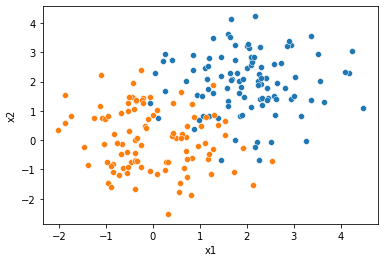

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pos = data[data['y'] == 1]
data_neg = data[data['y'] == -1]
sns.scatterplot(x='x1', y='x2', data=data_pos)
sns.scatterplot(x='x1', y='x2', data = data_neg)
plt.show()

**(4) Разделите данные на признаки и ответы.**

In [7]:
data_targets = data['y']
data_signs = data[['x1', 'x2']]

**(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели). Для обучения используйте всю выборку.**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_signs, data_targets, test_size=0.3, random_state=42)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 2) (140,)
(60, 2) (60,)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

**(6) Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели.**

In [16]:
print(model.score(X_test, y_test))
model.coef_

0.9


array([[1.89351346, 1.86410435]])

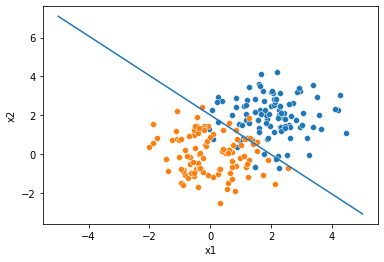

In [22]:
sns.scatterplot(x='x1', y='x2', data=data_pos)
sns.scatterplot(x='x1', y='x2', data = data_neg)
import numpy as np

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (model.intercept_[0] / w[1])
plt.plot(xx, yy)
plt.show()

**(7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.**

In [18]:
from sklearn.metrics import confusion_matrix

model_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df 

,0,1
0,0,0
1,0,28


**(8) Получите оценки качества классификации (на обучающей выборке): доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.**

In [25]:
from sklearn.metrics import accuracy_score, auc, f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
frp, trp, threshholds = sklearn.metrics.roc_curve(y_test, y_pred)
print(auc(frp, trp))

0.9
0.9032258064516129
0.9017857142857143


**(9) В окрестности гиперплоскости задайте некоторое количество случайных точек (отобразите их на рисунке новым цветом). Определите при помощи построенной модели принадлежность классу. Ошибается ли Ваша модель (оцените визуально)? В каком случае?**

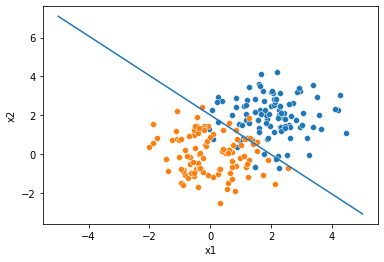

In [26]:
sns.scatterplot(x='x1', y='x2', data=data_pos)
sns.scatterplot(x='x1', y='x2', data = data_neg)
plt.plot(xx, yy)
plt.show()